In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import gif
from scipy.stats import norm, gamma
from scipy.stats import poisson

Implement the Gibbs sampler for normal distibution in the following cell.

In [27]:
def gibbs_sampler(initial_values, y, w, alfa, beta, num_posterior_samples=50):
    n = len(y)

    mu_samples = np.zeros((num_posterior_samples, 1))
    tau_samples = np.zeros((num_posterior_samples, 1))
    mu_samples[0] = initial_values[0]
    tau_samples[0] = initial_values[1]

    for i in range(1, num_posterior_samples):

        tau = tau_samples[i - 1]
        
        mean_mu = (tau * np.sum(y)) / (n * tau + w)
        var_mu = 1 / (n * tau + w)
        mu_samples[i] = norm.rvs(loc = mean_mu, scale = np.sqrt(var_mu)) # var sqrt förut
        
        mu = mu_samples[i]
        
        a_tau = alfa + n / 2
        b_tau = beta + 0.5 * np.sum((y - mu) ** 2)
        tau_samples[i] = 1 / gamma.rvs(a = a_tau, scale = 1 / b_tau)
        
    return mu_samples, tau_samples


In [29]:
# To create a gif image
@gif.frame
def plot_samples_normal(x, true_pdf, estimated_pdf, num_samples, title="Gibbs Sampling Normal dist",):
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    
    # Plot the true distribution
    ax.plot(x, true_pdf, label = "True distribution")
    
    # Plot the estimated distribution after each iteration
    ax.plot(x, estimated_pdf, label = "Estimated distribution after "+str(num_samples)+" iterations")
    
    # Keeping the axes scales same for good gifs
    # ax.set_xlim(xlims)
    ax.set_ylim((0, 0.3))
    
    
    ax.legend(loc='upper left')
    ax.set_title(title)

In [30]:
#Simulate data to check the Gibbs sampler
n = 100 #sample size
sigma_true = 2
sigma2_true = sigma_true**2
mu_true = 5
np.random.seed(4)
y = mu_true + np.random.randn(n)*sigma_true

In [31]:
initial_values = [1,5]
alpha = 1
beta = 1
w = 1
num_posterior_samples = 50

mu_samples,tau_samples = gibbs_sampler(initial_values, y, w, alpha, beta, num_posterior_samples)

c:\Users\filip\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\filip\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


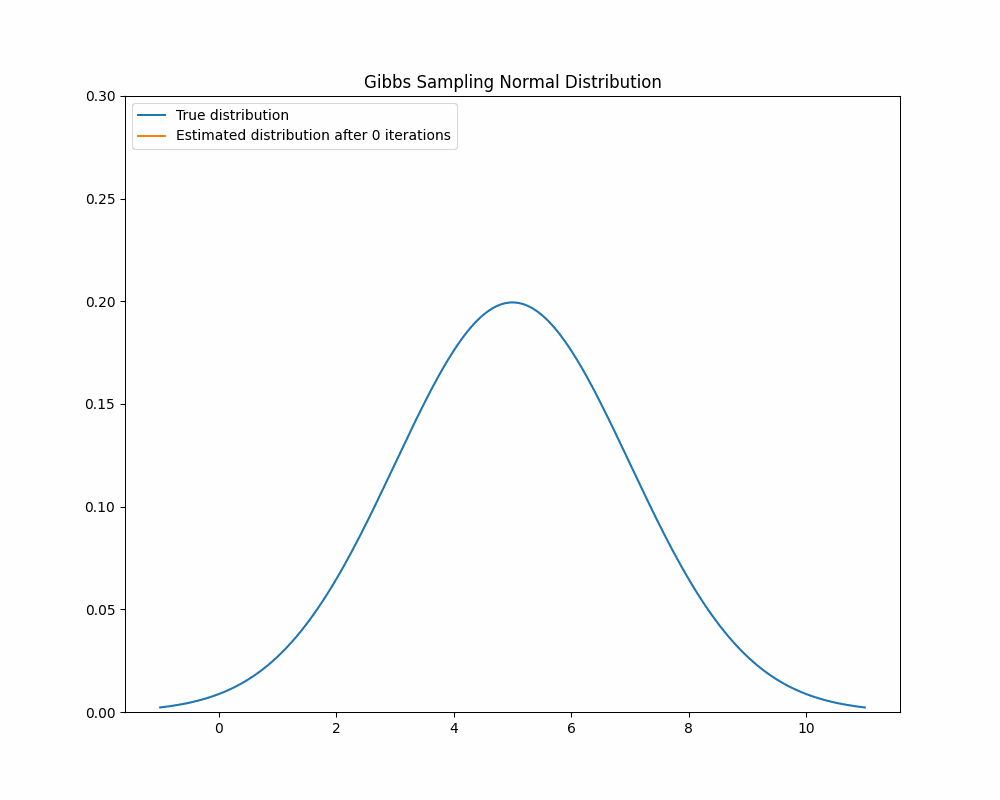

In [32]:
# Creating the gif
x = np.linspace(mu_true-3*sigma_true, mu_true + 3*sigma_true, 1000 )
true_pdf = norm.pdf(x, mu_true, sigma_true)

frames = []
for num_samples in range(len(mu_samples)):
    mu = np.mean(mu_samples[:num_samples])
    sigma = np.sqrt(np.mean(tau_samples[:num_samples]))
    estimated_pdf = norm.pdf(x, mu, sigma)
    

    frame = plot_samples_normal(x, true_pdf, estimated_pdf, num_samples,title="Gibbs Sampling Normal Distribution")
    frames.append(frame)

gif.save(frames, "gibbs_normal.gif", duration=150)
Image(filename="gibbs_normal.gif")

In [58]:
def plot_trace_and_histogram(mu_samples, tau_samples):

    mu_samples = mu_samples[1:]
    tau_inverse_samples = 1 / tau_samples[1:]

    n = len(mu_samples)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(range(n), mu_samples, color='blue', label=r"Traceplot of $\mu$")
    plt.xlabel("Iteration")
    plt.ylabel(r"$\mu$")
    plt.title("Traceplot of $\mu$")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.scatter(range(n), tau_inverse_samples, color='red', label=r"Traceplot of tau^-1")
    plt.xlabel("Iteration")
    plt.ylabel(r"tau^-1")
    plt.title("Traceplot of tau^-1 (variance)")
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.hist(mu_samples, bins=30, density=True, color='blue', label=r"$\mu$ samples")
    plt.xlabel(r"$\mu$")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of $\mu$")
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.hist(tau_inverse_samples, bins=30, density=True, color='red', label=r"tau^-1 samples")
    plt.xlabel(r"tau^-1")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of tau^-1 (variance)")
    plt.legend()

    plt.tight_layout()
    plt.show()

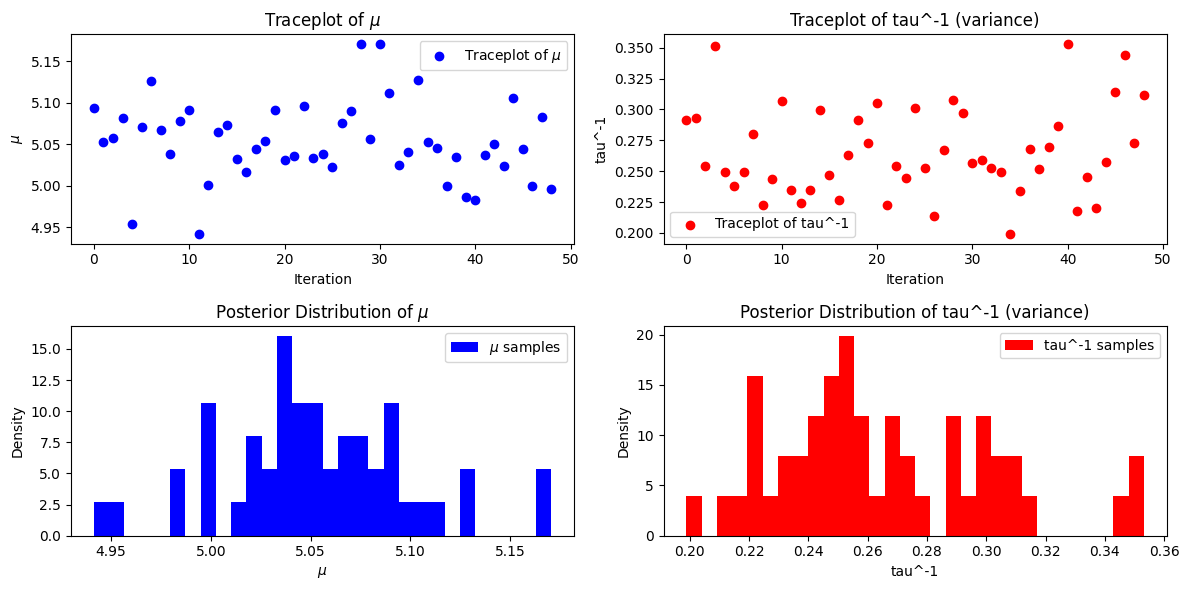

In [59]:
plot_trace_and_histogram(mu_samples, tau_samples)

Implement the Gibbs sampler for poisson distibution in the following cell.

In [60]:
# Gibbs sampler
def gibbs_sampler_pois(initial_values, y, num_posterior_samples):
    n = len(y)
    mu_samples = np.zeros((num_posterior_samples, 1))
    beta_samples = np.zeros((num_posterior_samples, 1))
    mu_samples[0] = initial_values[0]
    beta_samples[0] = initial_values[1]

    for i in range(1, num_posterior_samples):
    
        current_beta = beta_samples[i - 1]

        a_mu = alpha + np.sum(y)
        b_mu = n + current_beta
        mu_samples[i] = np.random.gamma(shape = a_mu, scale = 1 / b_mu)

        current_mu = mu_samples[i]

        a_beta = 3
        b_beta = 1 + current_mu
        beta_samples[i] = np.random.gamma(shape = a_beta, scale = 1 / b_beta)


    return mu_samples, beta_samples

In [67]:
# Generate y values
n = 100 #sample size
true_param = 5
np.random.seed(4)
y_pois = np.random.poisson(true_param, n)

In [68]:
initial_values = [1,2]
num_posterior_samples = 50

mu_samples, beta_samples = gibbs_sampler_pois(initial_values, y_pois, num_posterior_samples)

c:\Users\filip\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\filip\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


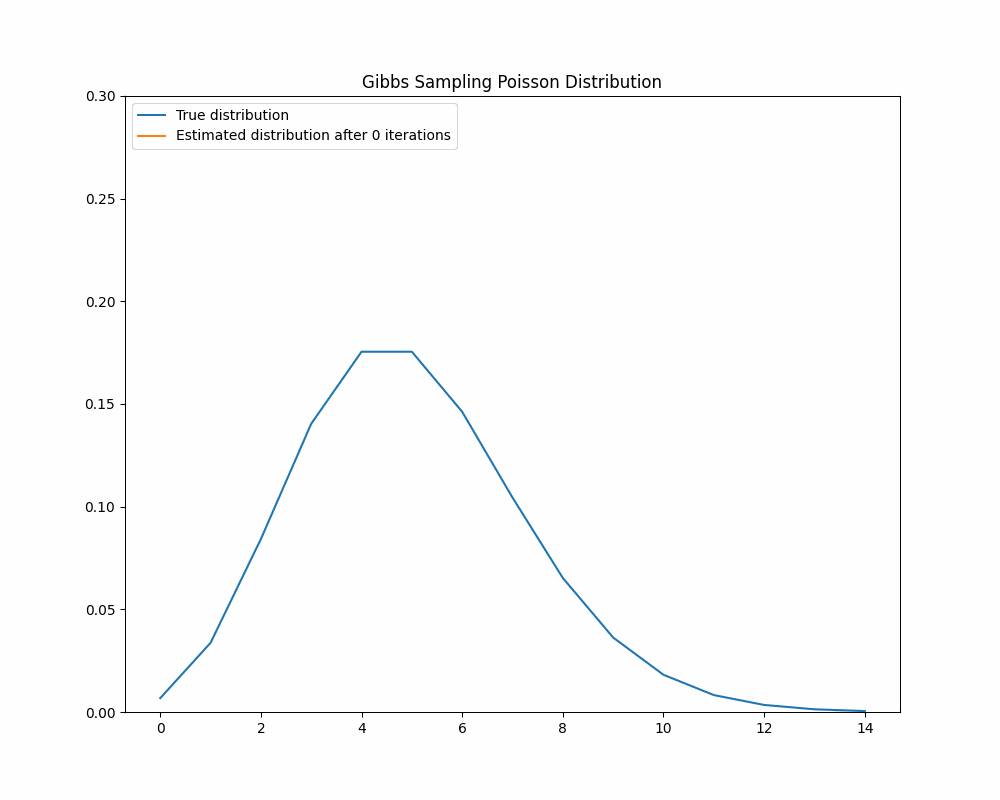

In [69]:
# Creating the gif
x = np.arange(0,15)
true_pdf = poisson.pmf(x, true_param)

frames = []
for num_samples in range(len(mu_samples)):
    mu = np.mean(mu_samples[:num_samples])
    estimated_pdf = poisson.pmf(x, mu)
    
    frame = plot_samples_normal(x, true_pdf, estimated_pdf, num_samples, title="Gibbs Sampling Poisson Distribution")
    frames.append(frame)

gif.save(frames, "gibbs_poisson.gif", duration=150)
Image(filename="gibbs_poisson.gif")

In [72]:
def plot_trace_and_histogram(mu_samples, beta_samples):

    mu_samples = mu_samples[1:]
    beta_samples = beta_samples[1:]

    n = len(mu_samples)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(range(n), mu_samples, color='blue', label=r"Traceplot of $\mu$")
    plt.xlabel("Iteration")
    plt.ylabel(r"$\mu$")
    plt.title("Traceplot of $\mu$")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.scatter(range(n), beta_samples, color='red', label=r"Traceplot of beta")
    plt.xlabel("Iteration")
    plt.ylabel(r"beta")
    plt.title("Traceplot of beta")
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.hist(mu_samples, bins=30, density=True, color='blue', label=r"$\mu$ samples")
    plt.xlabel(r"$\mu$")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of $\mu$")
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.hist(beta_samples, bins=30, density=True, color='red', label=r"beta samples")
    plt.xlabel(r"beta")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of beta")
    plt.legend()

    plt.tight_layout()
    plt.show()

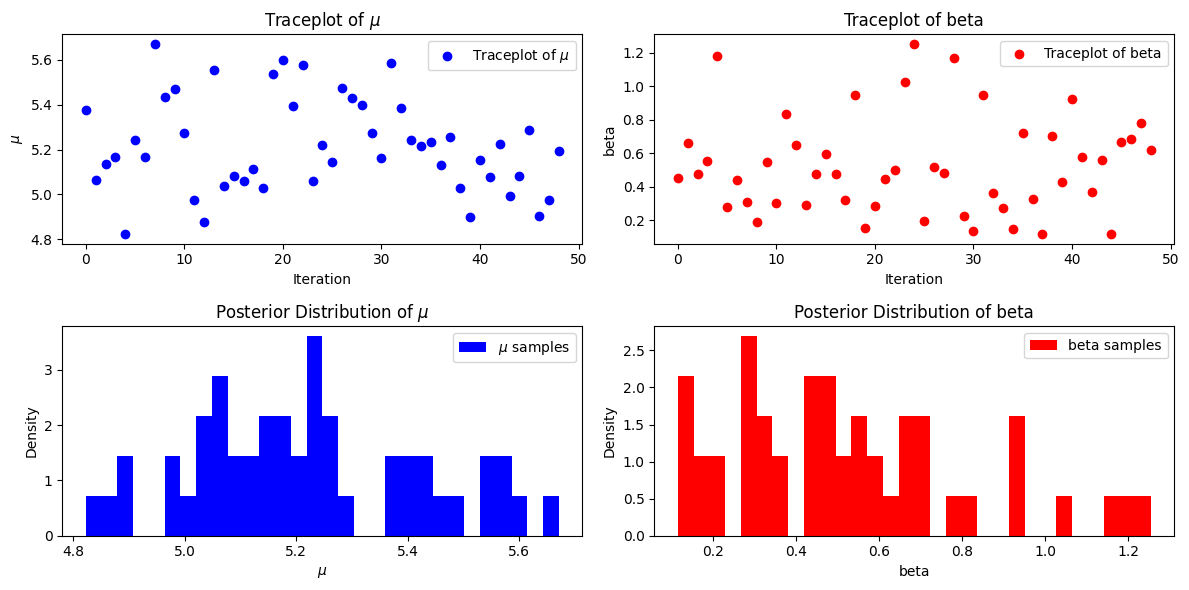

In [73]:
plot_trace_and_histogram(mu_samples, beta_samples)